In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('bank-full.csv')

In [9]:
# Explore the dataset
print(df.head())
print(df.info())
print(df.describe())

# Handle missing values if any
df.dropna(inplace=True)  # Example: Dropping rows with missing values


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [10]:
# Example: Selecting relevant features
features = ['age', 'job', 'marital', 'education', 'balance', 'campaign', 'previous']
target = 'y'  # Assuming 'y' is the column indicating whether a customer subscribed or not

X = df[features]
y = df[target].map({'no': 0, 'yes': 1})

In [11]:
# Example: Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['job', 'marital', 'education'], drop_first=True)


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Example: Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Build and Train the Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [15]:
# Build and Train the Decision Tree Model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [16]:
# Make predictions
logistic_preds = logistic_model.predict(X_test_scaled)
tree_preds = tree_model.predict(X_test_scaled)

In [17]:
# Evaluate Logistic Regression model
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, logistic_preds):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, logistic_preds)}")
print(f"Classification Report:\n{classification_report(y_test, logistic_preds)}")


Logistic Regression:
Accuracy: 0.88
Confusion Matrix:
[[7936   16]
 [1086    5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.24      0.00      0.01      1091

    accuracy                           0.88      9043
   macro avg       0.56      0.50      0.47      9043
weighted avg       0.80      0.88      0.82      9043



In [18]:
# Evaluate Decision Tree model
print("\nDecision Tree:")
print(f"Accuracy: {accuracy_score(y_test, tree_preds):.2f}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, tree_preds)}")
print(f"Classification Report:\n{classification_report(y_test, tree_preds)}")



Decision Tree:
Accuracy: 0.80
Confusion Matrix:
[[7027  925]
 [ 843  248]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      7952
           1       0.21      0.23      0.22      1091

    accuracy                           0.80      9043
   macro avg       0.55      0.56      0.55      9043
weighted avg       0.81      0.80      0.81      9043



In [19]:
# ROC Curve for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:,1])
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)


In [20]:
# ROC Curve for Decision Tree
fpr_tree, tpr_tree, _ = roc_curve(y_test, tree_model.predict_proba(X_test_scaled)[:,1])
roc_auc_tree = auc(fpr_tree, tpr_tree)


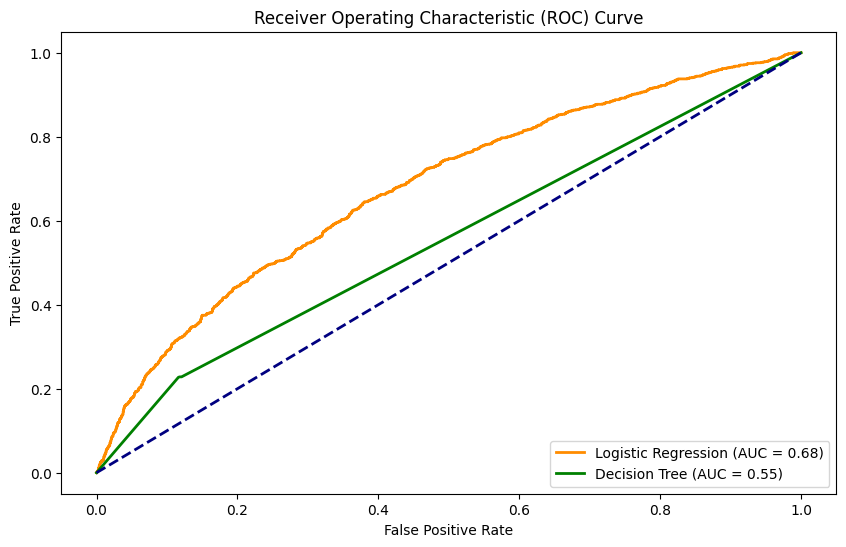

In [22]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic:.2f})')
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()